# 一种背景图像融合特效

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [3]:
src1= cv2.cvtColor(cv2.imread('../datas/car_2.jpg'),cv2.COLOR_BGR2RGB)
src2= cv2.cvtColor(cv2.imread('../datas/light_effect.jpg'),cv2.COLOR_BGR2RGB)

In [26]:
def merge_effect(src1,src2,k):
    if (np.array(src1.shape) != np.array(src2.shape)).all():
        return src1
    rows,cols = src1.shape[0],src1.shape[1]
    rgb1 = np.float64(src1)
    rgb2 = np.float64(src2)
    dst = np.zeros_like(rgb1)
    for i in range(rows):
        for j in range(cols):
            tx = j % cols
            ty = i % rows
            
            pixel_1 = src1[i,j]
            pixel_2 = src2[ty,tx]
            
            xr,xg,xb = 0.0,0.0,0.0
            
            xr = (pixel_1[0] - (pixel_2[0] - k * 255)) / (2 * 255 * k)
            xg = (pixel_1[1] - (pixel_2[1] - k * 255)) / (2 * 255 * k)
            xb = (pixel_1[2] - (pixel_2[2] - k * 255)) / (2 * 255 * k)
            
            dst[i,j,0] = 255.0 * (1.0 - 3.0 * xr * xr + 2.0 * xr * xr * xr)
            dst[i,j,1] = 255.0 * (1.0 - 3.0 * xg * xg + 2.0 * xg * xg * xg)
            dst[i,j,2] = 255.0 * (1.0 - 3.0 * xb * xb + 2.0 * xb * xb * xb)
    dst[dst < 0] = 0
    dst[dst > 255] = 255
    return cv2.convertScaleAbs(dst)

In [30]:
dst = merge_effect(src1,src2,0.5)

Text(0.5,1,'SRC2')

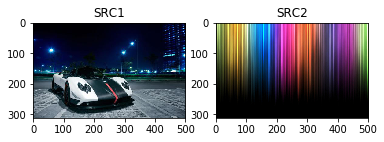

In [25]:
plt.subplot(121)
plt.imshow(src1)
plt.title('SRC1')
plt.subplot(122)
plt.imshow(src2)
plt.title('SRC2')

Text(0.5,1,'DST')

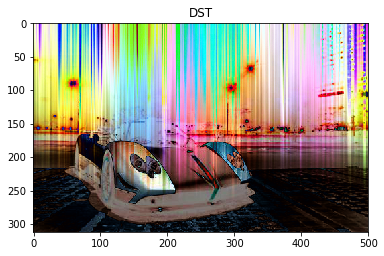

In [31]:
plt.imshow(dst)
plt.title('DST')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45312455